## <font color='blue'> <b>Task:</b></font>
Create a multivariable linear regression analysis tool to estimate apartment prices in Oulu.

Use price data (https://moodle.oulu.fi/pluginfile.php/1587991/mod_assign/intro/oulu_apartment_data_for_analysis.csv) from last year, which contains the following columns:

        1 Region: Region where the apartment house is located  
        2 rooms : Number of bedrooms  
        3 Area : Area in square meters  
        4 Price: Price paid  
        5 Year : Building year  
        6 elevator : Is there elevator in the building  
        7 status : Good, fair or bad  
        8 plot : Own or rental  
        9 price_per_area : Price divided by area  
        10 region_value : Average price per are on that regions

The target parameter is the price and you should create a regression model where you use all the possible features to predict the price as accurately as possible.  
Scikit-learn linear regression might be the easiest choice for the tool (from sklearn.linear_model import LinearRegression), but feel free to use some other regression method if you wish. 

Split data to train and test datasets to estimate goodness of the model. 

<b>Construct the model and answer the following questions:  
- What are the features (columns) used in the model? Why must you exclude some columns? Which are excluded and why?  
- Is your model successful? Is there any way to improve it? Does it predict price better if you select only one region, like Keskusta or Tuira?  
- Return your executed Jupyter notebook, which includes code, visualization of results and answers to questions.  
- Bonus questions (not counted in the evaluation, but essential later in the course): Are there better models than linear regression for this task?</b>

In [1]:
# import required libraries
import plotly.express as px # python -m pip install plotly
import seaborn as sns # python -m pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
data = pd.read_csv('/Users/imak/documents/python/projects/data_analysis/oulu_apartment_data_for_analysis.csv', index_col=0)
data.head()

,Region,rooms,Area,Price,Year,elevator,status,plot,price_per_area,region_value
0,Kaukovainio,1,33.0,41500,1970,yes,good,rent,1257.575758,1336.636048
1,Myllytulli,1,37.5,96000,1992,yes,good,rent,2560.000000,3141.028570
2,Myllytulli,1,41.0,139000,2000,yes,good,own,3390.243902,3141.028570
3,Myllyoja,1,31.0,39000,1974,no,good,rent,1258.064516,1268.167478
4,Myllyoja,1,32.0,37600,1974,yes,bad,rent,1175.000000,1268.167478


In [3]:
#information about a DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          639 non-null    object 
 1   rooms           639 non-null    int64  
 2   Area            639 non-null    float64
 3   Price           639 non-null    int64  
 4   Year            639 non-null    int64  
 5   elevator        639 non-null    object 
 6   status          639 non-null    object 
 7   plot            639 non-null    object 
 8   price_per_area  639 non-null    float64
 9   region_value    639 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 54.9+ KB


In [4]:
# Finding missing values
data.isna().sum() # 0
data.notnull().sum() # 639 values in all column
data.isnull().sum() # 0 

Region            0
rooms             0
Area              0
Price             0
Year              0
elevator          0
status            0
plot              0
price_per_area    0
region_value      0
dtype: int64

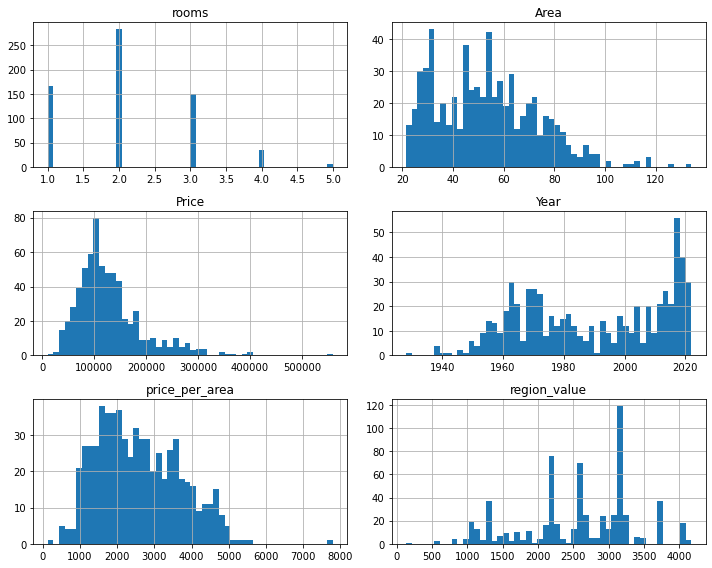

In [5]:
# Histogram for each numerical attribute
data.hist(bins=50, figsize=(10,8))
plt.tight_layout()
plt.show()

In [6]:
# # Detecting Outliers
# fig, axs = plt.subplots(2,3, figsize = (10,5))
# sns.set_palette("deep")
# plt1 = sns.boxplot(x = data['rooms'], ax = axs[0,0])
# plt2 = sns.boxplot(x = data['Area'], ax = axs[0,1])
# plt3 = sns.boxplot(x = data['Price'], ax = axs[0,2])
# plt1 = sns.boxplot(x = data['Year'], ax = axs[1,0])
# plt2 = sns.boxplot(x = data['price_per_area'], ax = axs[1,1])
# plt3 = sns.boxplot(x = data['region_value'], ax = axs[1,2])
# plt.tight_layout()
# plt.plot()

#### <font color=#3340FF>View the Correlation between Variables</font>

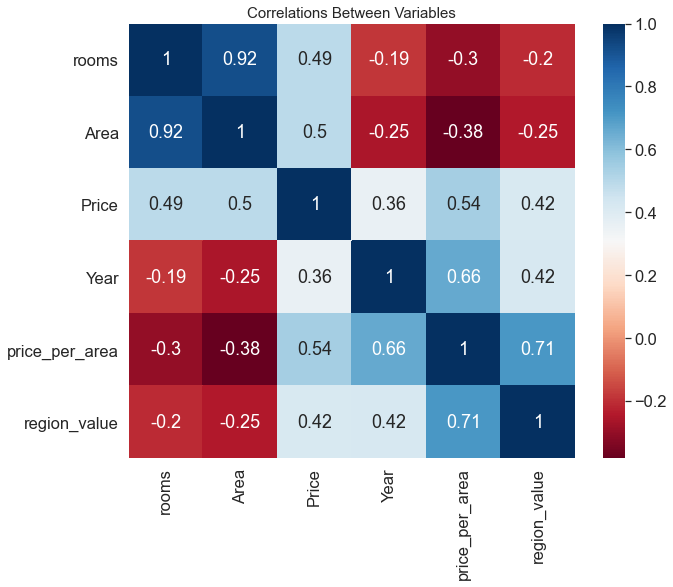

In [7]:
# plot how the features are correlated to each other, and to Price
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
sns.heatmap(data.corr(), cmap="RdBu", annot=True)
plt.title("Correlations Between Variables", size=15)
plt.show()

# <font color=#3340FF>Multivariable model</font>

In [8]:
# import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

## <font color=#3340FF>Selecting target parameter and feature variables</font>

<font color=#3340FF>From above figure we can see there is positive correlation between 'Price' and 'rooms','Area','Year','price_per_area','region_value' variabales</font>

In [9]:
# selecting target parameter and feature variables
y = data['Price'].values # Target parameters
x = data[['rooms','Area','Year','price_per_area','region_value']].values # Feature variable


<font color=#3340FF>With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales.
There are two common ways to get all attributes to have the same scale: min- max scaling and standardization.
Here we are applying standardization by using the StandardScaler class from the scikit-learn library's preprocessing module. 
The fit method is used to calculate the parameters (mean and standard deviation) used to standardize the dataset. 
The transform method is then used to apply this standardization to the dataset and return the standardized version of the dataset. 
This is a common preprocessing step in machine learning to ensure that all features have similar scale and distribution.</font>


In [10]:
#Scaling the data
scaler = preprocessing.StandardScaler().fit(x) #standard core normalization
x = scaler.transform(x)

## <font color=#3340FF>Splitting the data</font>

<font color=#3340FF>Split the dataset x and the target variable y into two subsets: a training set and a test set. The test_size parameter specifies the proportion of the data that should be allocated to the test set. In this case, it is set to 0.2, so 20% of the data will be used for testing and 80% for training.</font>

In [11]:
#Divide data to train and test data sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

## <font color=#3340FF>Multiple Linear regression model (main method by task requirement)</font>
<font color=#3340FF>Multiple linear regression can be used:  
- To estimate how strongly two or more independent variables influence the single dependent variable. Such as how location, time, condition, and area can influence the price of a property.  
- To find the value of the dependent variables at a definite condition of all the independent variables. For example, finding the price of a property located at a certain place, with a specific area and its condition.<font color=#3340FF>

In [12]:
# creating a Linear regression model
model_linear = LinearRegression()
# fitting the model
model_linear.fit(x_train,y_train)
print('Model coefficients are', model_linear.coef_)

Model coefficients are [-3032.72640428 56927.00835013   151.3588989  55201.03829648
   422.00871764]


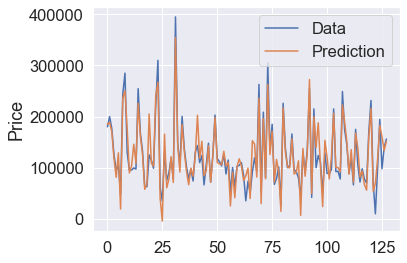

R^2 score is 0.8712075604640598


In [13]:
#test the model!
prediction_linear = model_linear.predict(x_test)
plt.plot(y_test)
plt.plot(prediction_linear)
plt.legend(['Data','Prediction'])
plt.ylabel('Price')
plt.tight_layout()
plt.show()
print('R^2 score is', model_linear.score(x_test,y_test))

## <font color=#3340FF> Lasso regression model (other method) <font>
<font color=#3340FF> Lasso Regression a type of linear regression that performs regularization along with feature selection. 
It prohibits the absolute size of the regression coefficient.  
If there is a lot of predictors (features), and not all of them are that important, Lasso may be used.<font>

In [14]:
# creating a Lasso regression model
model_lasso = Lasso()
# fitting the model
model_lasso.fit(x_train,y_train)
print('Model coefficients are', model_lasso.coef_)

Model coefficients are [-3019.79881752 56913.30706792   150.41802298 55199.24653177
   422.11940261]


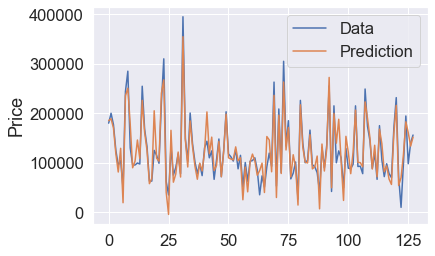

R^2 score is 0.8712067815720533


In [15]:
#test the model!
prediction_lasso = model_lasso.predict(x_test)
plt.plot(y_test)
plt.plot(prediction_lasso)
plt.legend(['Data','Prediction'])
plt.ylabel('Price')
plt.show()
print('R^2 score is', model_lasso.score(x_test,y_test))

## <font color=#3340FF> Ridge Regression (other method) <font>
<font color=#3340FF>This is another types of linear regression which is usually used when there is a high correlation between the independent variables.  
If there is only have a few predictors and all of them are really relevant for predictions,we can try Ridge as a good regularized linear regression method.<font>

In [16]:
# creating a ridge regression model
model_ridge = Ridge() # Ridge regression
model_ridge.fit(x_train,y_train)
print('Model coefficients are', model_ridge.coef_)

Model coefficients are [-2296.6764236  56056.15866576   277.23516565 54752.47550026
   628.67110733]


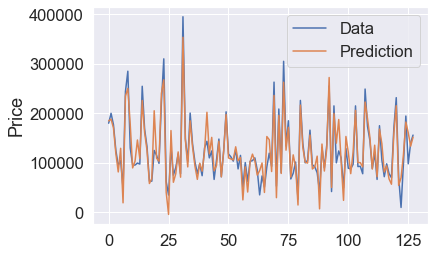

R^2 score is 0.8712395673767982


In [17]:
#test the model!
prediction_ridge = model_ridge.predict(x_test)
plt.plot(y_test)
plt.plot(prediction_ridge)
plt.legend(['Data','Prediction'])
plt.ylabel('Price')
plt.show()

print('R^2 score is', model_ridge.score(x_test,y_test))

## <font color=#3340FF> Logistic Regression (other method)<font>
<font color=#3340FF> Logistic regression is one of the types of regression analysis technique, which gets used when the dependent variable is discrete. Example: 0 or 1, true or false, etc. This means the target variable can have only two values. <font>

In [18]:
# creating a Logistic regression model
model_logistic = LogisticRegression()
# fitting the model
model_logistic.fit(x_train,y_train)
print('Model coefficients are', model_logistic.coef_)

Model coefficients are [[-0.17009863 -0.35970376 -0.15056041 -0.88670247 -1.05057982]
 [-0.40592055 -0.15007195  0.14005903 -1.37991772 -1.13882107]
 [-0.30145972  0.03323663 -0.08932781 -0.84593531 -1.04555527]
 ...
 [-0.3712666   1.11670648  0.48542687  1.01804228 -0.31850165]
 [ 1.26390971  1.22786964  0.52330118  0.36735345  0.63237467]
 [ 0.65092869  1.3565478   0.29704414  1.22995102 -0.22012193]]


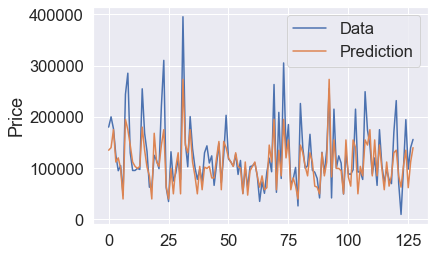

R^2 score is 0.0234375


In [19]:
#test the model!
prediction_regression = model_logistic.predict(x_test)
plt.plot(y_test)
plt.plot(prediction_regression)
plt.legend(['Data','Prediction'])
plt.ylabel('Price')
plt.show()

print('R^2 score is', model_logistic.score(x_test,y_test))

<font color=#3340FF> From above we could see Linear regression, lasso, ridge model score is good and almost same. whereas Logistic regression model score is poor. So we need to carefully review relevant variables, their relationships, expected coefficient signs and effect magnitudes before selecting model. </font>

# <font color=#148F77> Answer to the Questions  <font>
## <font color=#1A5276> What are the features (columns) used in the model? Why must you exclude some columns? Which are excluded and why? <font>

<font color=#17202A>
<li> The selected features (coulmns) are 'rooms','Area','Year','price_per_area' and 'region_value' that has numerical attributes  </li>
<li> Columns with categorical valriable ('elevator','status' and 'plot') were excluded.  </li>
<li> In the model we used only features that has numerical attributes.Columns with qualitative valriable are excluded. Qualitative variables ('elevator','status' and 'plot' ) could be used in the model but they require special attention in regression analysis. unlike binary or continuous variables, they cannot be entered into the regression equation just as they are. Instead, they need to be recoded into a series of variables which can then be entered into the regression model.  </li>
<font>

## <font color=#1A5276> Is your model successful? <font>


<font color=#17202A>
<li> The coefficient of determination, or R2 , is a measure that provides information about the goodness of fit of a model.  </li>
<li> In the linear regression model R-square is 0.88, it means 88% of the variation in the output variable is explained by the input variables. </li>
<li> So we can say the model is successful </li>
</font>

## <font color=#1A5276> Is there any way to improve it? <font>

<font color=#17202A>
There are several ways to improve a model, some of the common techniques are:

<li>Feature engineering: selecting or creating relevant features that better represent the data and can help improve the model's performance.</li>
<li>Hyperparameter tuning: adjusting the parameters of the model or the learning algorithm to optimize performance.</li>
<li>Regularization: adding a term to the model's objective function to prevent overfitting.</li>
<li>Ensemble methods: combining multiple models to improve the overall performance.</li>
<li>Cross-validation: evaluating the model's performance using multiple different train-test splits to reduce the chance of overfitting.</li>
<li>Data preprocessing: Scaling the data, handling missing values and outliers</li>
<li>Experimenting with different algorithms: trying multiple algorithms and selecting the one that performs best.</li>
<li>More data: If possible, increasing the size of the training dataset can help improve the model's performance.</li>

It's important to note that not all of these techniques will be applicable for every dataset or problem and it's also important to evaluate the trade-off between model's performance and complexity
</font>


## <font color=#1A5276> Does it predict price better if you select only one region, like Keskusta or Tuira?  <font>
<font color=#17202A> If we select one region to predict price as per below model we can not have better prediction. In this instance, for tuira we got R-squre value 0.74 and for Keskusta it is 0.91 which can not gurantee better score than the original model score 0.87</font>

In [20]:
# Selecting only one region
data_sub_tuira = data['Region'] == 'Tuira'
data_sub_keskusta = data['Region'] == 'Keskusta'
data_tuira = data[data_sub_tuira]
data_keskusta = data[data_sub_keskusta]

In [21]:
# selecting target parameter and feature variables
y_tuira = data_tuira['Price'].values # Target parameters
x_tuira = data_tuira[['rooms','Area','Year','price_per_area','region_value']].values # Feature variable

In [22]:
# selecting target parameter and feature variables
y_keskusta = data_keskusta['Price'].values # Target parameters
x_keskusta = data_keskusta[['rooms','Area','Year','price_per_area','region_value']].values # Feature variable

In [23]:
#Scaling the data
scaler_tuira = preprocessing.StandardScaler().fit(x_tuira) #standard core normalization
x_tuira = scaler_tuira.transform(x_tuira)

In [24]:
#Scaling the data
scaler_keskusta = preprocessing.StandardScaler().fit(x_keskusta) #standard core normalization
x_keskusta = scaler_keskusta.transform(x_keskusta)

In [25]:
#Divide data to train and test data sets
x_tuira_train, x_tuira_test, y_tuira_train, y_tuira_test = train_test_split(x_tuira,y_tuira,test_size=0.2)

In [26]:
#Divide data to train and test data sets
x_keskusta_train, x_keskusta_test, y_keskusta_train, y_keskusta_test = train_test_split(x_keskusta,y_keskusta,test_size=0.2)

In [27]:
# creating a Linear regression model
model_linear = LinearRegression()
# fitting the model
model_linear.fit(x_tuira_train,y_tuira_train)
print('Model coefficients are', model_linear.coef_)

Model coefficients are [-26494.07292218  93148.5175722  -10728.04994471  84389.05524264
      0.        ]


In [28]:
# creating a Linear regression model
model_linear = LinearRegression()
# fitting the model
model_linear.fit(x_keskusta_train,y_keskusta_train)
print('Model coefficients are', model_linear.coef_)

Model coefficients are [13100.30588997 45933.97353754 11255.49108884 39050.80408739
     0.        ]


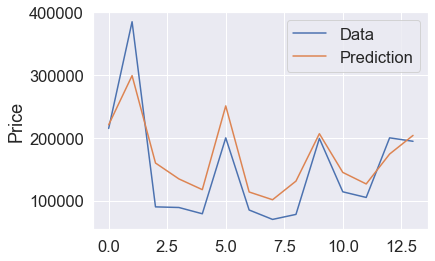

R^2 score is 0.7479948046040688


In [29]:
#test the model!
prediction_tuira = model_linear.predict(x_tuira_test)
plt.plot(y_tuira_test)
plt.plot(prediction_tuira)
plt.legend(['Data','Prediction'])
plt.ylabel('Price')
plt.show()
print('R^2 score is', model_linear.score(x_tuira_test,y_tuira_test))

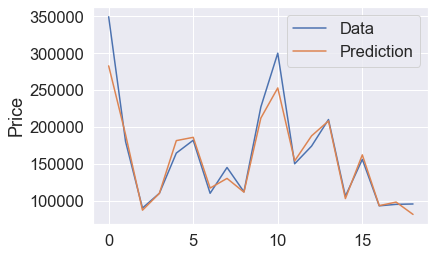

R^2 score is 0.9126751198008048


In [30]:
#test the model!
prediction_keskusta = model_linear.predict(x_keskusta_test)
plt.plot(y_keskusta_test)
plt.plot(prediction_keskusta)
plt.legend(['Data','Prediction'])
plt.ylabel('Price')
plt.show()
print('R^2 score is', model_linear.score(x_keskusta_test,y_keskusta_test))

## <font color=#1A5276>Bonus questions (not counted in the evaluation, but essential later in the course): Are there better models than linear regression for this task? <font>

## <font color=#C0392B > Decision Tree <font>

In [31]:
# import required libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score

In [32]:
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(x_train,y_train)
tr_regressor.score(x_test,y_test)
pred_tr = tr_regressor.predict(x_test)
decision_score=tr_regressor.score(x_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)
print(expl_tr)

0.9494334262756373


## <font color=#C0392B > Random Forest Regression Model <font> 

In [33]:
#import required libraries
from sklearn.ensemble import RandomForestRegressor

In [34]:
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(x_train,y_train)
rf_regressor.score(x_test,y_test)
rf_pred =rf_regressor.predict(x_test)
rf_score=rf_regressor.score(x_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)
print(expl_rf)

0.9664242760289932


## <font color=#C0392B > Linear regression model <font>

In [35]:
mlr = LinearRegression()
mlr.fit(x_train,y_train)
mlr_score = mlr.score(x_test,y_test)
pred_mlr = mlr.predict(x_test)
expl_mlr = explained_variance_score(pred_mlr,y_test)
print(expl_mlr)

0.861170210264084


In [36]:
print("Multiple Linear Regression Model Score is ",round(mlr.score(x_test,y_test)*100))
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(x_test,y_test)*100))
print("Random Forest Regression Model Score is ",round(rf_regressor.score(x_test,y_test)*100))

Multiple Linear Regression Model Score is  87
Decision tree  Regression Model Score is  95
Random Forest Regression Model Score is  97


In [37]:
models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression'],
                            'Score':[mlr_score,decision_score,rf_score],
                            'Explained Variance Score':[expl_mlr,expl_tr,expl_rf]
                           })
models_score.sort_values(by='Score',ascending = False)

,Model,Score,Explained Variance Score
2,Random forest Regression,0.969798,0.966424
1,Decision Tree,0.953729,0.949433
0,Multiple Linear Regression,0.871208,0.861170


<font color=#3340FF> From the above it is clear that random forest accuracy is 96.9% and also expalined variance score (The explained variance score explains the dispersion of errors of a given dataset,Scores close to 1.0 are highly desired) is 0.96 . So Random Forest is a suitable model for predicting the price of the apartment. <font>